# Композиции алгоритмов машинного обучения. Задача классификации.

# Метод: Случайный лес

## Задание

1. Разработать программу реализующую алгоритм случайный лес для анализа выбранного набора данных.
2. Визуализировать используемый набор данных и работу алгоритма.
3. Построить график зависимости качества классификации от количества деревьев в лесу.
4. Построить график зависимости качества классификации от глубины дерева.
5. Провести анализ зависимости качества классификации от используемого критерия разделения (Джини, энтропия, ошибка классификации).
6. Подобрать параметры алгоритма так, чтобы получить наилучшее качество модели на тестовых данных.

# Случайный лес

RF (random forest) — это множество деревьев решений. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству.

### <u>Результат алгоритма случайного леса можно сравнить с алгоритмом дерево решений из файла DecisionTree.ipynb (папка Practical work 6), т.к. случайный лес состоит из деревьев дерева решений.</u>

## Подключение необходимых библиотек

`%matplotlib inline` -> визуализирует графики с matplotlib прямо в jupyter notebook, а не в отдельном окне

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

## Набор данных 1

In [35]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=0)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике

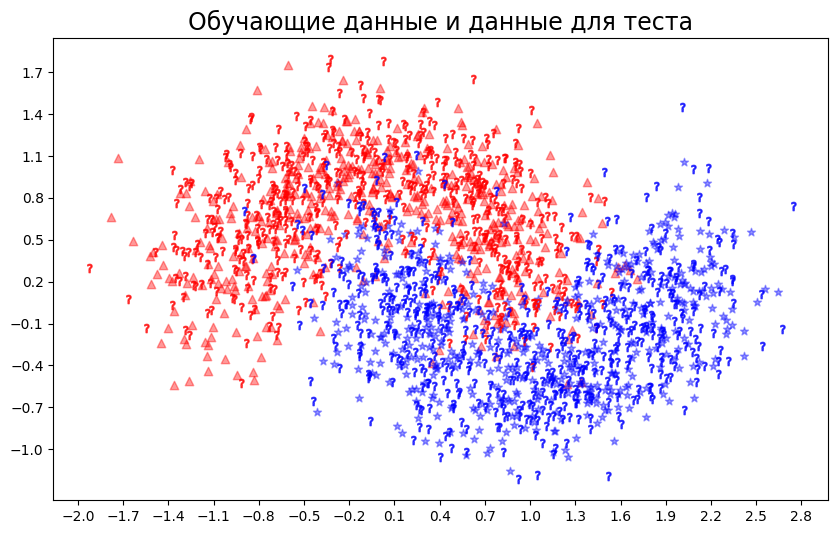

In [37]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

### Реализуем метод Случайный лес для набора данных №1

#### Реализуем метод без гиперпараметров

In [38]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.891
Точность работы модели (model.score) = 0.891


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators`, `criterion` и `max_depth`.

> **n_estimators**: int, default=100<br>
The number of trees in the forest.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Гипперпараметры, которые будут использоваться без изменения: `bootstrap` и `n_jobs`.

> **bootstrap**: bool, default=True<br>
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree. (Будем использовать только True)

> **n_jobs**: int, default=None<br>
По умолчанию n_jobs=1, т.е. случайный лес строится на одном процессоре. Cущественно ускорить построение позволит значение n_jobs=-1, т.е. строить на максимально возможном числе процессоров.

#### Поиск наилучших гиперпараметров для метода

In [47]:
%%time
value_accuracy_score_array = [[[],[],[]], [[],[],[]], [[],[],[]]]

# value_accuracy_score_array[0] - n_estimators="100"
# value_accuracy_score_array[1] - n_estimators="150"
# value_accuracy_score_array[2] - n_estimators="300"

# value_accuracy_score_array[..][0] - n_estimators=".." criterion="gini"
# value_accuracy_score_array[..][1] - n_estimators=".." criterion="entropy"
# value_accuracy_score_array[..][2] - n_estimators=".." criterion="log_loss"

# value_accuracy_score_array[0][0][0] - n_estimators="100", criterion="gini", max_depth = 1
# value_accuracy_score_array[0][0][1] - n_estimators="100", criterion="gini", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][1][0] - n_estimators="100", criterion="entropy", max_depth = 1
# value_accuracy_score_array[0][1][1] - n_estimators="100", criterion="entropy", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][2][0] - n_estimators="100", criterion="log_loss", max_depth = 1
# value_accuracy_score_array[0][2][1] - n_estimators="100", criterion="log_loss", max_depth = 2
# value_accuracy_score_array[0][1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...

count_tree_in_forest = [100, 150, 300]
criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1, 21))

# Индексы используются для записи в value_accuracy_score_array
index_count_tree_in_forest = 0
index_criterion_function = 0
index_count_max_depth = 0

for tree_in_forest in count_tree_in_forest:
    index_criterion_function = 0
    for crit_func in criterion_function:
        index_count_max_depth = 0
        for count_tree_depth in count_max_depth:
            model = RandomForestClassifier(n_estimators=tree_in_forest, criterion=crit_func, 
                                           max_depth=count_tree_depth, bootstrap=True, n_jobs=-1)

            cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
            sum_score_cross_validate = 0
            for i in range(3):
                sum_score_cross_validate += cv_result['test_score'][i]
            value_accuracy_score_array[index_count_tree_in_forest][index_criterion_function].\
                                            append(sum_score_cross_validate/3)  # avg score cross_validate
            index_count_max_depth += 1
        index_criterion_function += 1
    index_count_tree_in_forest += 1

CPU times: user 35.7 s, sys: 6.42 s, total: 42.2 s
Wall time: 42.8 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `n_estimators`, `criterion` и `max_depth` модель дает лучший результат.

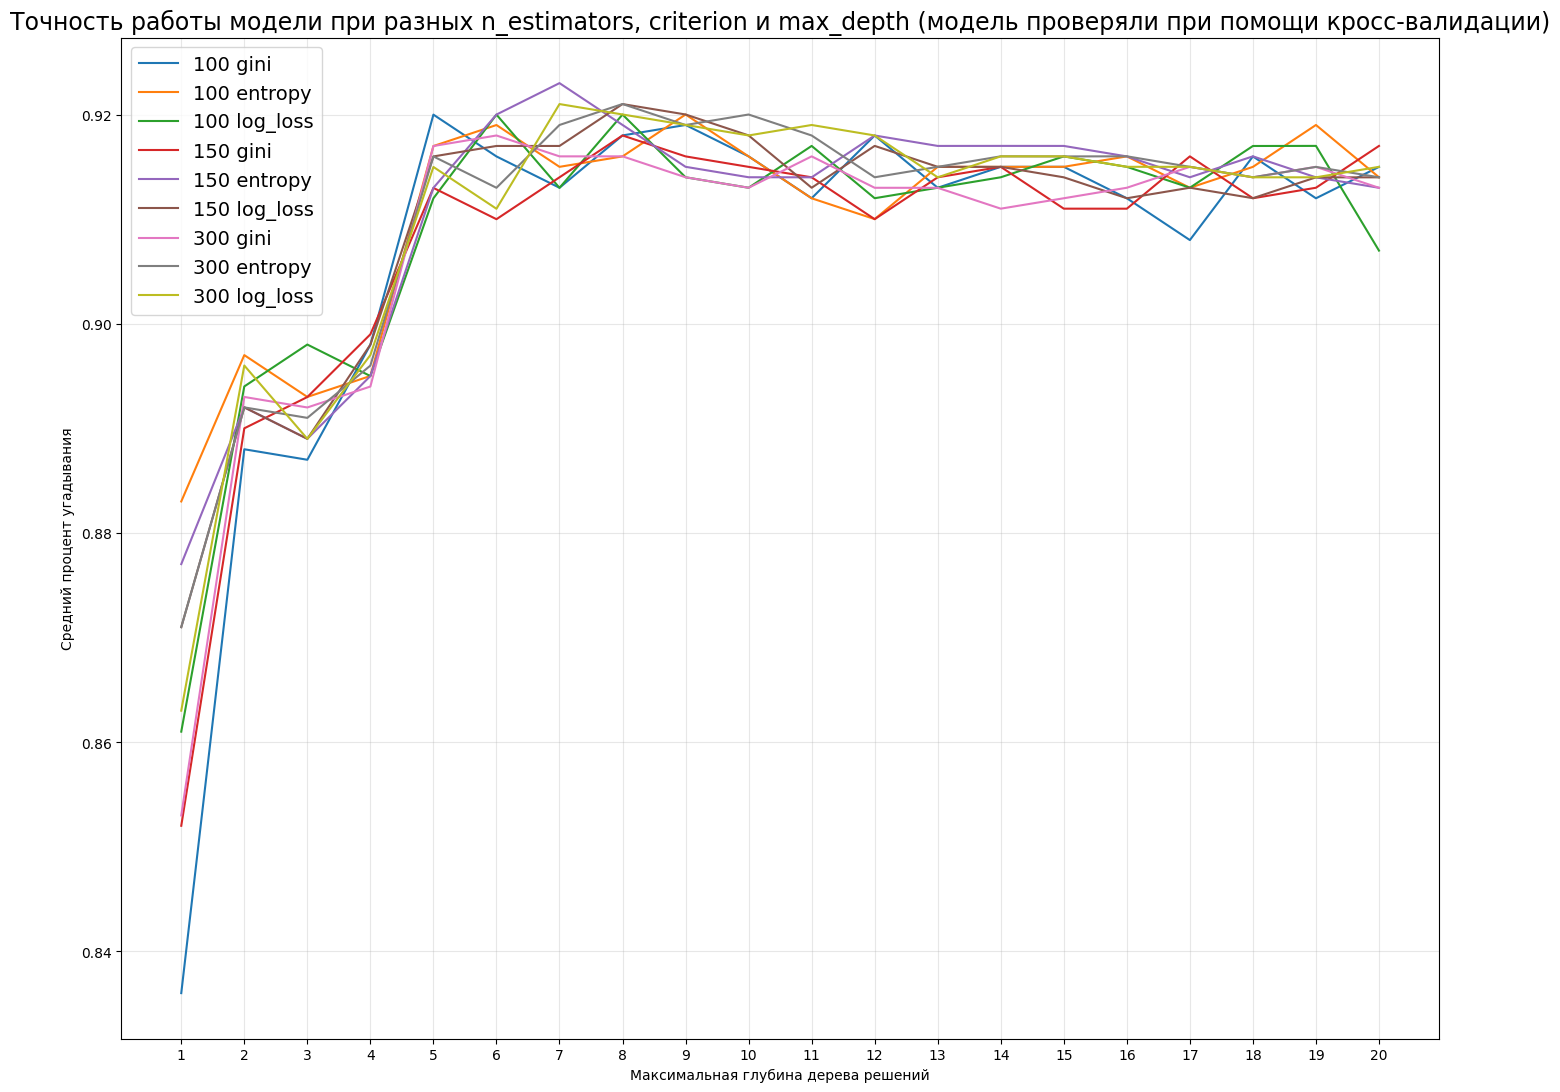

In [48]:
fig, ax = plt.subplots(figsize = (17,13))

for i in range(len(count_tree_in_forest)):
    for j in range(len(criterion_function)):
        ax.plot(count_max_depth, value_accuracy_score_array[i][j],
                label=str(count_tree_in_forest[i]) + ' ' + criterion_function[j])

ax.set_title("Точность работы модели при разных n_estimators, criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(fontsize=14, loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**Из полученного графика видно, что наилучшее решение получится при <u>n_estimators=150</u>, <u>criterion="entropy"</u> и <u>max_depth=7</u>. Протестировав модель с помощью кросс-валидации, мы понижаем шанс переобучения модели.**

#### Реализуем метод с наилучшими гиперпараметрами

In [80]:
model = RandomForestClassifier(n_estimators=150, criterion="entropy", max_depth=7, bootstrap=True, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.901
Точность работы модели (model.score) = 0.901


#### Изобразим результат работы алгоритма на графике

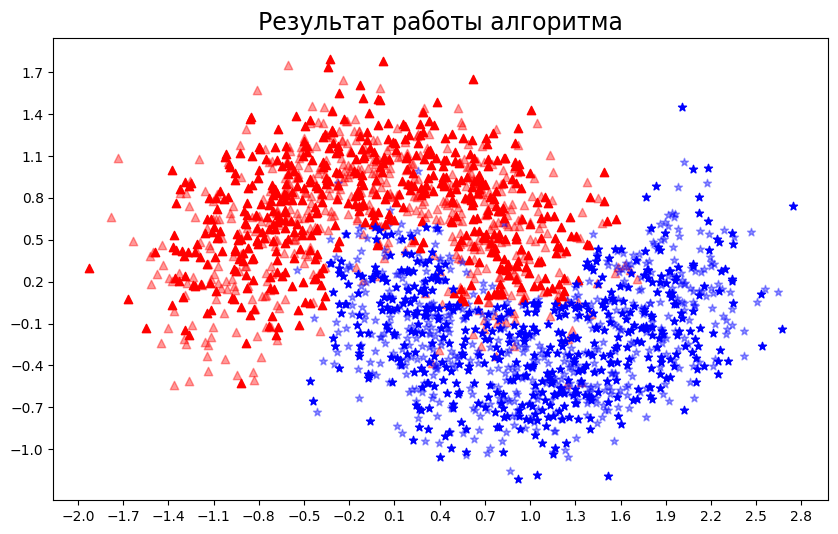

In [82]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

## Набор данных 2

In [83]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, class_sep=0.4,
                           random_state=1, n_clusters_per_class=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

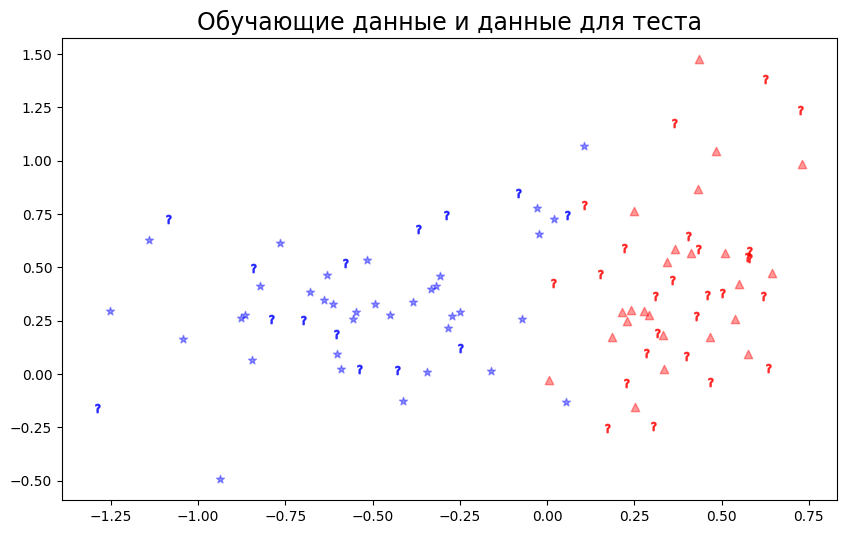

In [85]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

### Реализуем метод Случайный лес для набора данных №2

#### Реализуем метод без гиперпараметров

In [86]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.95
Точность работы модели (model.score) = 0.95


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators`, `criterion` и `max_depth`.

> **n_estimators**: int, default=100<br>
The number of trees in the forest.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Гипперпараметры, которые будут использоваться без изменения: `bootstrap` и `n_jobs`.

> **bootstrap**: bool, default=True<br>
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree. (Будем использовать только True)

> **n_jobs**: int, default=None<br>
По умолчанию n_jobs=1, т.е. случайный лес строится на одном процессоре. Cущественно ускорить построение позволит значение n_jobs=-1, т.е. строить на максимально возможном числе процессоров.

#### Поиск наилучших гиперпараметров для метода

In [87]:
%%time
value_accuracy_score_array = [[[],[],[]], [[],[],[]], [[],[],[]]]

# value_accuracy_score_array[0] - n_estimators="100"
# value_accuracy_score_array[1] - n_estimators="150"
# value_accuracy_score_array[2] - n_estimators="300"

# value_accuracy_score_array[..][0] - n_estimators=".." criterion="gini"
# value_accuracy_score_array[..][1] - n_estimators=".." criterion="entropy"
# value_accuracy_score_array[..][2] - n_estimators=".." criterion="log_loss"

# value_accuracy_score_array[0][0][0] - n_estimators="100", criterion="gini", max_depth = 1
# value_accuracy_score_array[0][0][1] - n_estimators="100", criterion="gini", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][1][0] - n_estimators="100", criterion="entropy", max_depth = 1
# value_accuracy_score_array[0][1][1] - n_estimators="100", criterion="entropy", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][2][0] - n_estimators="100", criterion="log_loss", max_depth = 1
# value_accuracy_score_array[0][2][1] - n_estimators="100", criterion="log_loss", max_depth = 2
# value_accuracy_score_array[0][1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...

count_tree_in_forest = [100, 150, 300]
criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1, 21))

# Индексы используются для записи в value_accuracy_score_array
index_count_tree_in_forest = 0
index_criterion_function = 0
index_count_max_depth = 0

for tree_in_forest in count_tree_in_forest:
    index_criterion_function = 0
    for crit_func in criterion_function:
        index_count_max_depth = 0
        for count_tree_depth in count_max_depth:
            model = RandomForestClassifier(n_estimators=tree_in_forest, criterion=crit_func, 
                                           max_depth=count_tree_depth, bootstrap=True, n_jobs=-1)

            cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
            sum_score_cross_validate = 0
            for i in range(3):
                sum_score_cross_validate += cv_result['test_score'][i]
            value_accuracy_score_array[index_count_tree_in_forest][index_criterion_function].\
                                            append(sum_score_cross_validate/3)  # avg score cross_validate
            index_count_max_depth += 1
        index_criterion_function += 1
    index_count_tree_in_forest += 1

CPU times: user 29 s, sys: 3.77 s, total: 32.7 s
Wall time: 32.9 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `n_estimators`, `criterion` и `max_depth` модель дает лучший результат.

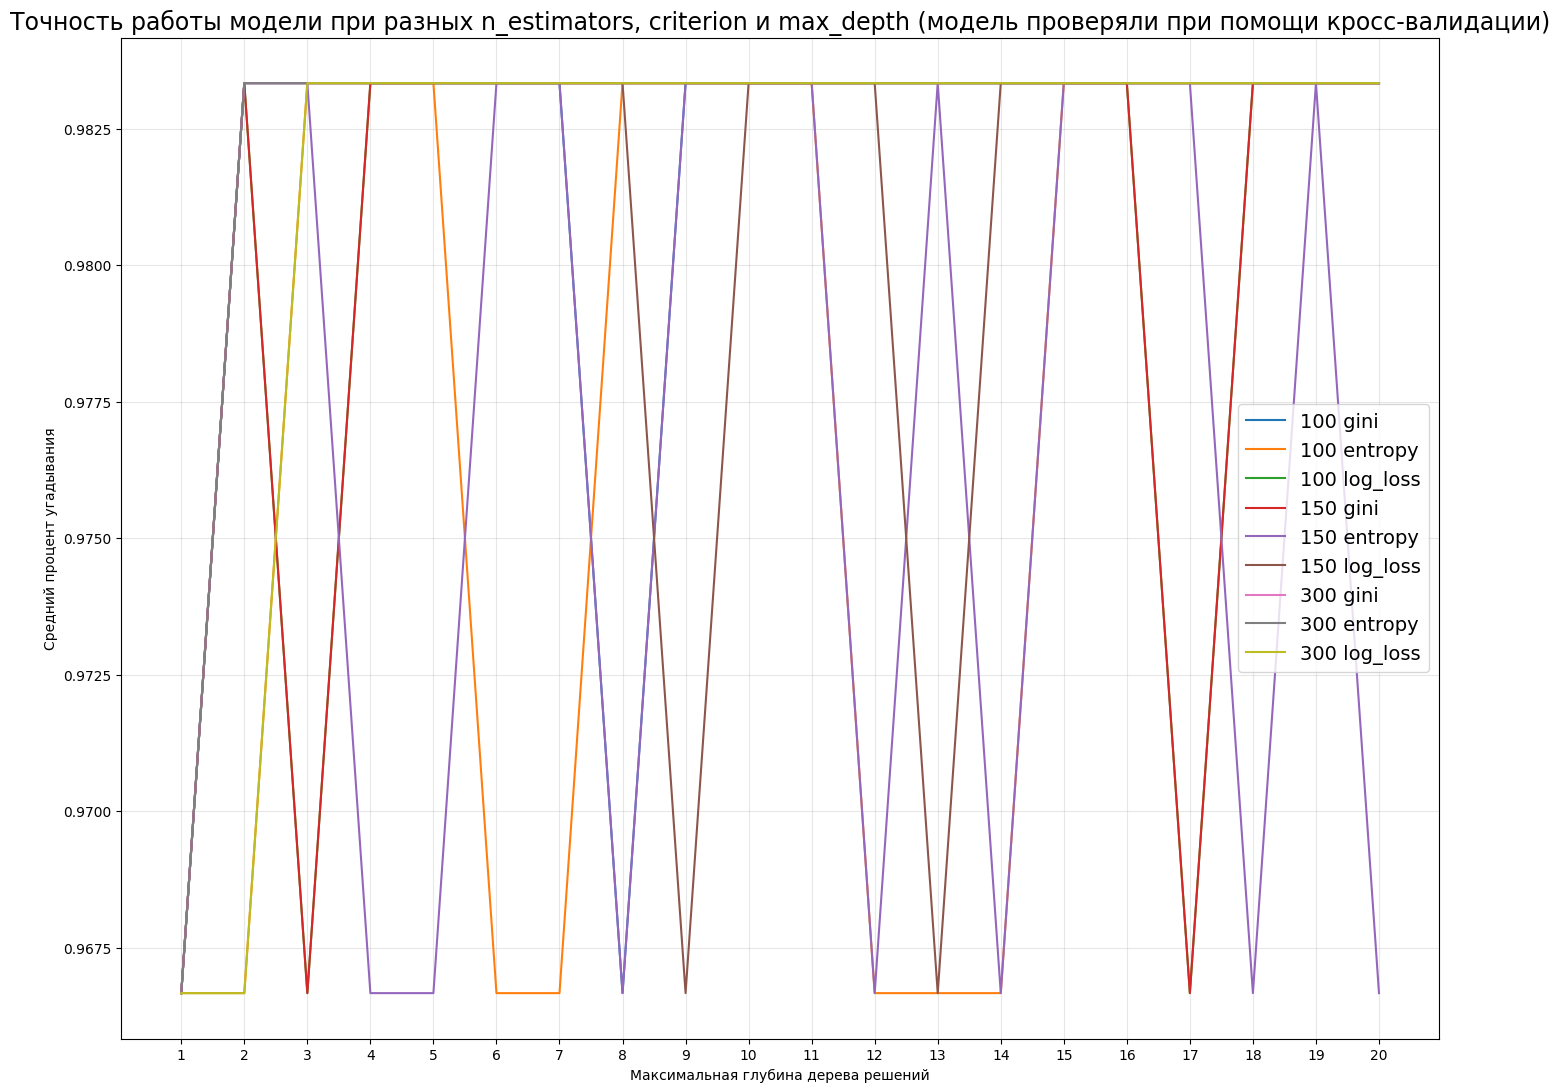

In [88]:
fig, ax = plt.subplots(figsize = (17,13))

for i in range(len(count_tree_in_forest)):
    for j in range(len(criterion_function)):
        ax.plot(count_max_depth, value_accuracy_score_array[i][j],
                label=str(count_tree_in_forest[i]) + ' ' + criterion_function[j])

ax.set_title("Точность работы модели при разных n_estimators, criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(fontsize=14, loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**При решении задачи на алгоритм дерево решений (файл DecisionTree.ipynb), было выяснено, что на самом деле для такого не глубокого дерева, сложно сделать какой-то вывод по гиперпараметрам, так как они дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности.<br>
Наш лес состоит из таких деревьев.**<br>
n_estimators=100<br>
criterion="gini", criterion="entropy", criterion="log_loss" -> выдадут одинаковый результат.<br>
max_depth нет смысла выставлять больше 3, потому что не получится собрать дерево глубже этого значения.

#### Реализуем метод с наилучшими гиперпараметрами

In [95]:
model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=3, bootstrap=True, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.95
Точность работы модели (model.score) = 0.95


#### Изобразим результат работы алгоритма на графике

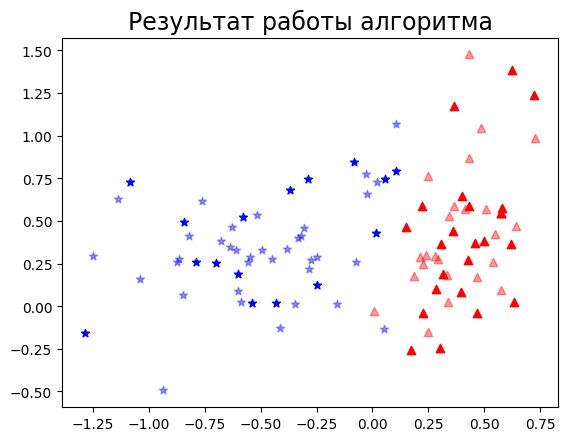

In [96]:
fig, ax = plt.subplots()

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

## Набор данных 3

In [97]:
X, y = make_circles(n_samples=100, noise=0.2, factor=0.3, random_state=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике.

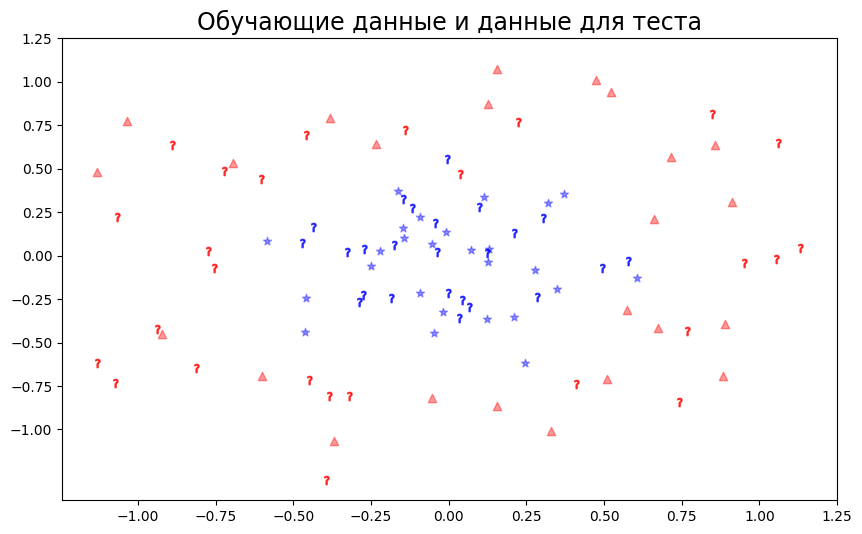

In [99]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

### Реализуем метод Случайный лес для набора данных №3

#### Реализуем метод без гиперпараметров

In [100]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.92
Точность работы модели (model.score) = 0.92


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators`, `criterion` и `max_depth`.

> **n_estimators**: int, default=100<br>
The number of trees in the forest.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Гипперпараметры, которые будут использоваться без изменения: `bootstrap` и `n_jobs`.

> **bootstrap**: bool, default=True<br>
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree. (Будем использовать только True)

> **n_jobs**: int, default=None<br>
По умолчанию n_jobs=1, т.е. случайный лес строится на одном процессоре. Cущественно ускорить построение позволит значение n_jobs=-1, т.е. строить на максимально возможном числе процессоров.

#### Поиск наилучших гиперпараметров для метода

In [103]:
%%time
value_accuracy_score_array = [[[],[],[]], [[],[],[]], [[],[],[]]]

# value_accuracy_score_array[0] - n_estimators="100"
# value_accuracy_score_array[1] - n_estimators="150"
# value_accuracy_score_array[2] - n_estimators="300"

# value_accuracy_score_array[..][0] - n_estimators=".." criterion="gini"
# value_accuracy_score_array[..][1] - n_estimators=".." criterion="entropy"
# value_accuracy_score_array[..][2] - n_estimators=".." criterion="log_loss"

# value_accuracy_score_array[0][0][0] - n_estimators="100", criterion="gini", max_depth = 1
# value_accuracy_score_array[0][0][1] - n_estimators="100", criterion="gini", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][1][0] - n_estimators="100", criterion="entropy", max_depth = 1
# value_accuracy_score_array[0][1][1] - n_estimators="100", criterion="entropy", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][2][0] - n_estimators="100", criterion="log_loss", max_depth = 1
# value_accuracy_score_array[0][2][1] - n_estimators="100", criterion="log_loss", max_depth = 2
# value_accuracy_score_array[0][1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...

count_tree_in_forest = [100, 150, 300]
criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1, 21))

# Индексы используются для записи в value_accuracy_score_array
index_count_tree_in_forest = 0
index_criterion_function = 0
index_count_max_depth = 0

for tree_in_forest in count_tree_in_forest:
    index_criterion_function = 0
    for crit_func in criterion_function:
        index_count_max_depth = 0
        for count_tree_depth in count_max_depth:
            model = RandomForestClassifier(n_estimators=tree_in_forest, criterion=crit_func, 
                                           max_depth=count_tree_depth, bootstrap=True, n_jobs=-1)

            cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
            sum_score_cross_validate = 0
            for i in range(3):
                sum_score_cross_validate += cv_result['test_score'][i]
            value_accuracy_score_array[index_count_tree_in_forest][index_criterion_function].\
                                            append(sum_score_cross_validate/3)  # avg score cross_validate
            index_count_max_depth += 1
        index_criterion_function += 1
    index_count_tree_in_forest += 1

CPU times: user 28.5 s, sys: 3.58 s, total: 32.1 s
Wall time: 32.1 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `n_estimators`, `criterion` и `max_depth` модель дает лучший результат.

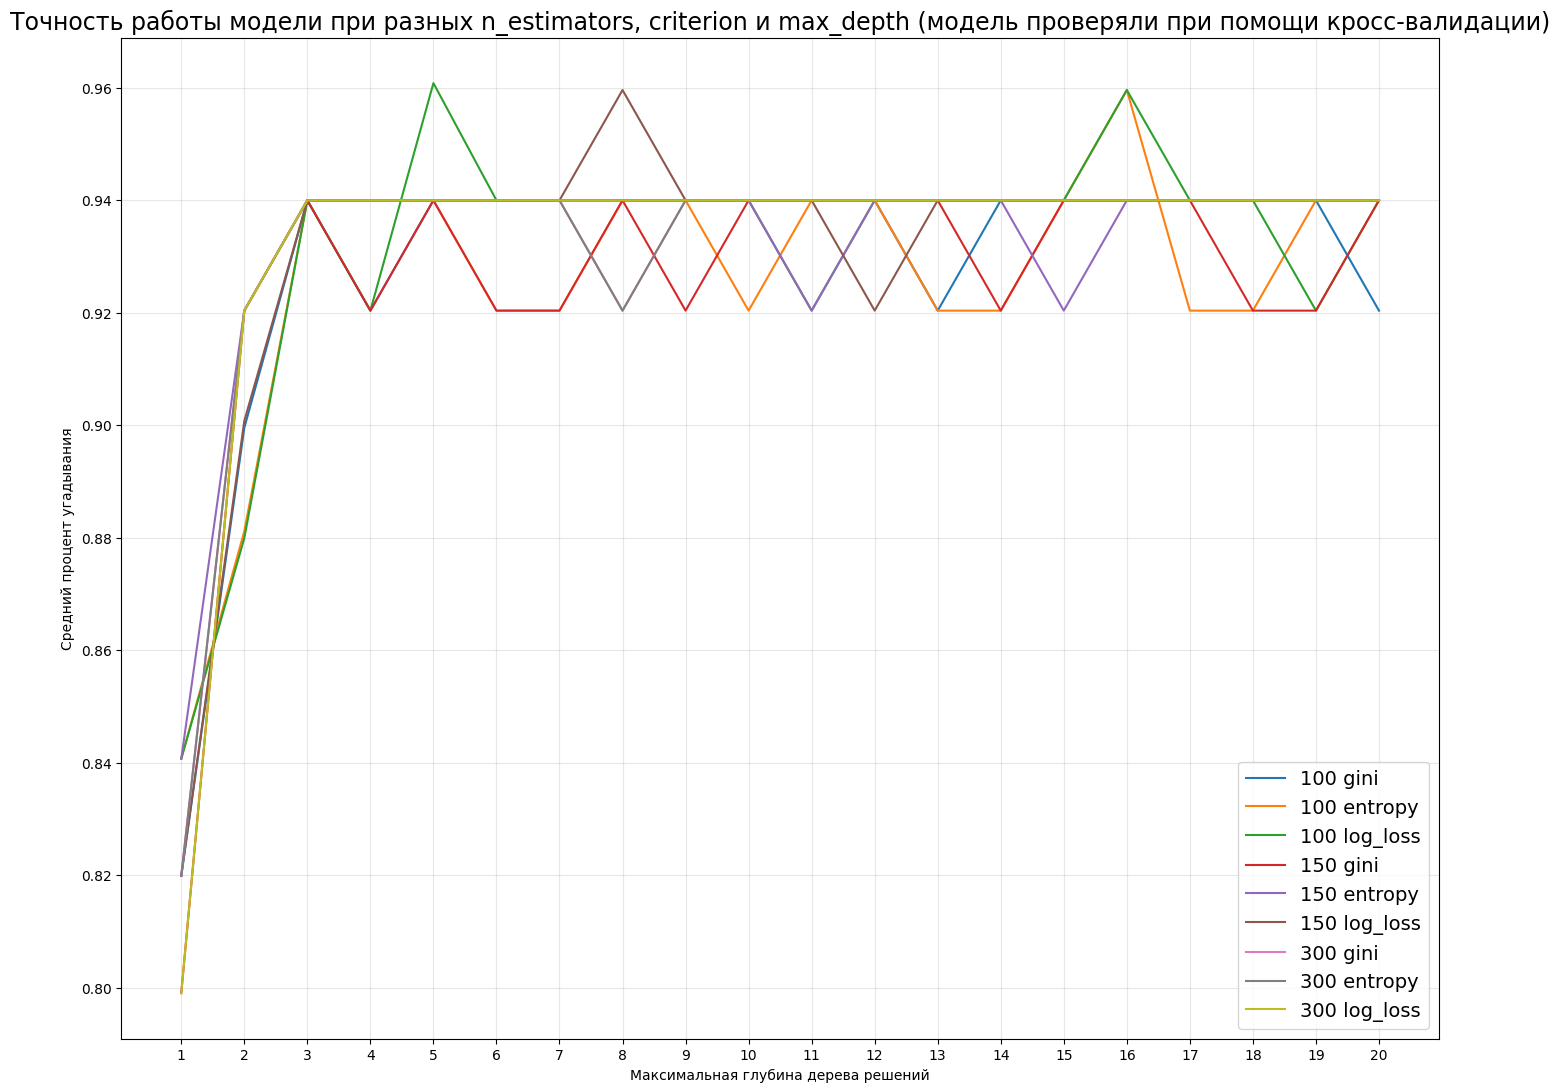

In [104]:
fig, ax = plt.subplots(figsize = (17,13))

for i in range(len(count_tree_in_forest)):
    for j in range(len(criterion_function)):
        ax.plot(count_max_depth, value_accuracy_score_array[i][j],
                label=str(count_tree_in_forest[i]) + ' ' + criterion_function[j])

ax.set_title("Точность работы модели при разных n_estimators, criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(fontsize=14, loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**При решении задачи на алгоритм дерево решений (файл DecisionTree.ipynb), было выяснено, что на самом деле для такого не глубокого дерева, сложно сделать какой-то вывод по гиперпараметрам, так как они дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности.<br>
Наш лес состоит из таких деревьев.**<br>
n_estimators=100<br>
criterion="gini", criterion="entropy", criterion="log_loss" -> выдадут одинаковый результат.<br>
max_depth нет смысла выставлять больше 6, потому что не получится собрать дерево глубже этого значения.

#### Реализуем метод с наилучшими гиперпараметрами

In [105]:
model = RandomForestClassifier(n_estimators=100, criterion="log_loss", max_depth=5, bootstrap=True, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.96
Точность работы модели (model.score) = 0.96


#### Изобразим результат работы алгоритма на графике

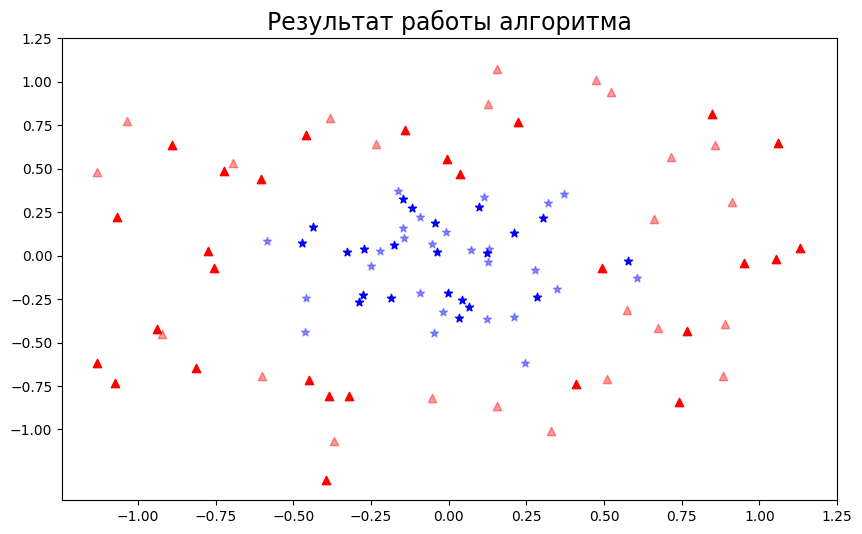

In [106]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

## Набор данных 4

In [107]:
X, y = make_blobs(n_samples=100, centers=[[4, 4], [-4, -4]], cluster_std=2, random_state=0)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X= np.dot(X, transformation)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике.

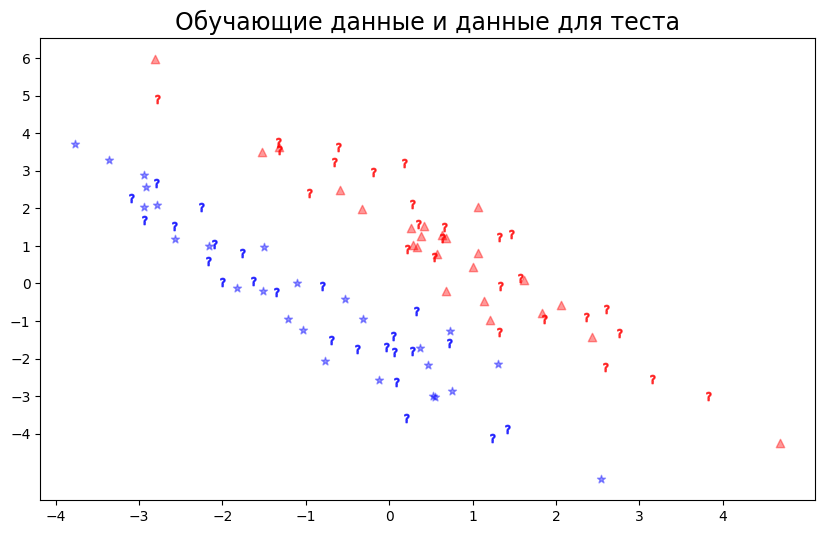

In [109]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()

### Реализуем метод Случайный лес для набора данных №4

#### Реализуем метод без гиперпараметров

In [110]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.9
Точность работы модели (model.score) = 0.9


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators`, `criterion` и `max_depth`.

> **n_estimators**: int, default=100<br>
The number of trees in the forest.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Гипперпараметры, которые будут использоваться без изменения: `bootstrap` и `n_jobs`.

> **bootstrap**: bool, default=True<br>
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree. (Будем использовать только True)

> **n_jobs**: int, default=None<br>
По умолчанию n_jobs=1, т.е. случайный лес строится на одном процессоре. Cущественно ускорить построение позволит значение n_jobs=-1, т.е. строить на максимально возможном числе процессоров.

#### Поиск наилучших гиперпараметров для метода

In [131]:
%%time
value_accuracy_score_array = [[[],[],[]], [[],[],[]], [[],[],[]]]

# value_accuracy_score_array[0] - n_estimators="100"
# value_accuracy_score_array[1] - n_estimators="150"
# value_accuracy_score_array[2] - n_estimators="300"

# value_accuracy_score_array[..][0] - n_estimators=".." criterion="gini"
# value_accuracy_score_array[..][1] - n_estimators=".." criterion="entropy"
# value_accuracy_score_array[..][2] - n_estimators=".." criterion="log_loss"

# value_accuracy_score_array[0][0][0] - n_estimators="100", criterion="gini", max_depth = 1
# value_accuracy_score_array[0][0][1] - n_estimators="100", criterion="gini", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][1][0] - n_estimators="100", criterion="entropy", max_depth = 1
# value_accuracy_score_array[0][1][1] - n_estimators="100", criterion="entropy", max_depth = 2
# value_accuracy_score_array[1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...
# value_accuracy_score_array[0][2][0] - n_estimators="100", criterion="log_loss", max_depth = 1
# value_accuracy_score_array[0][2][1] - n_estimators="100", criterion="log_loss", max_depth = 2
# value_accuracy_score_array[0][1][0][1] - n_estimators="150", criterion="gini", max_depth = 2
# ...

count_tree_in_forest = [100, 150, 300]
criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1, 21))

# Индексы используются для записи в value_accuracy_score_array
index_count_tree_in_forest = 0
index_criterion_function = 0
index_count_max_depth = 0

for tree_in_forest in count_tree_in_forest:
    index_criterion_function = 0
    for crit_func in criterion_function:
        index_count_max_depth = 0
        for count_tree_depth in count_max_depth:
            model = RandomForestClassifier(n_estimators=tree_in_forest, criterion=crit_func, 
                                           max_depth=count_tree_depth, bootstrap=True, n_jobs=-1)

            cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
            sum_score_cross_validate = 0
            for i in range(3):
                sum_score_cross_validate += cv_result['test_score'][i]
            value_accuracy_score_array[index_count_tree_in_forest][index_criterion_function].\
                                            append(sum_score_cross_validate/3)  # avg score cross_validate
            index_count_max_depth += 1
        index_criterion_function += 1
    index_count_tree_in_forest += 1

CPU times: user 29 s, sys: 3.7 s, total: 32.7 s
Wall time: 32.6 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `n_estimators`, `criterion` и `max_depth` модель дает лучший результат.

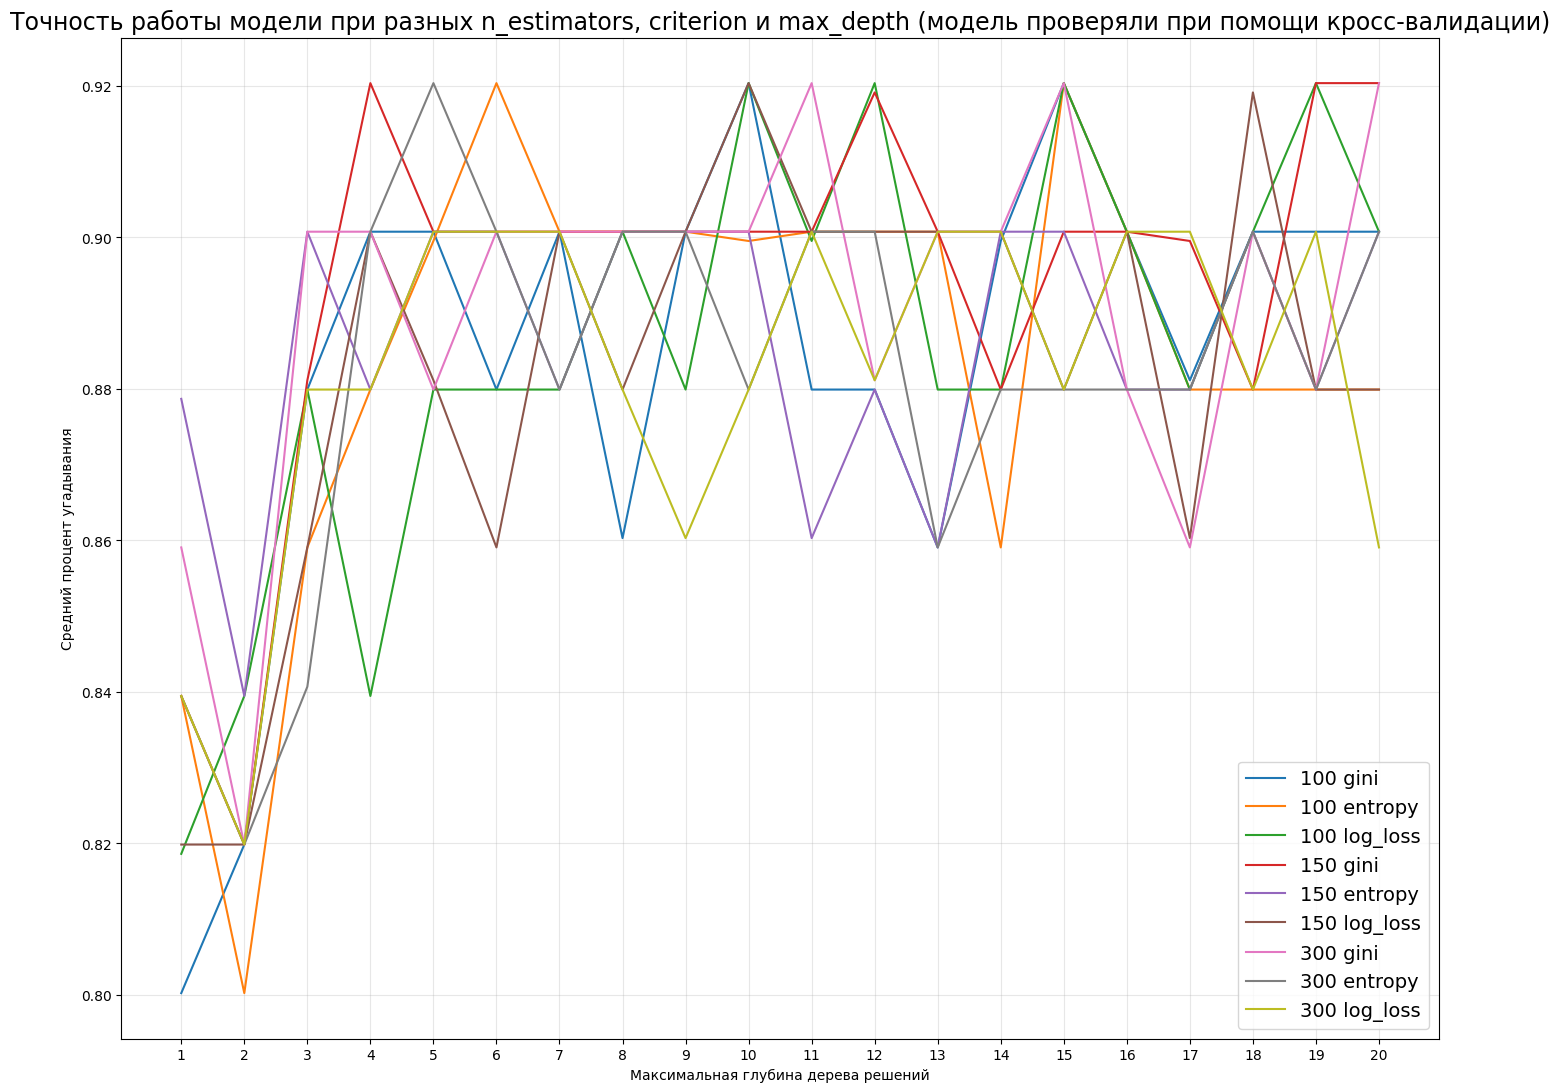

In [132]:
fig, ax = plt.subplots(figsize = (17,13))

for i in range(len(count_tree_in_forest)):
    for j in range(len(criterion_function)):
        ax.plot(count_max_depth, value_accuracy_score_array[i][j],
                label=str(count_tree_in_forest[i]) + ' ' + criterion_function[j])

ax.set_title("Точность работы модели при разных n_estimators, criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(fontsize=14, loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**При решении задачи на алгоритм дерево решений (файл DecisionTree.ipynb), было выяснено, что на самом деле для такого не глубокого дерева, сложно сделать какой-то вывод по гиперпараметрам, так как они дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности.<br>
Наш лес состоит из таких деревьев.**<br>
n_estimators=150<br>
criterion="gini", criterion="entropy", criterion="log_loss" -> выдадут одинаковый результат.<br>
max_depth нет смысла выставлять больше 5, потому что не получится собрать дерево глубже этого значения.

#### Реализуем метод с наилучшими гиперпараметрами

In [151]:
model = RandomForestClassifier(n_estimators=150, criterion="gini", max_depth=4, bootstrap=True, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.94
Точность работы модели (model.score) = 0.94


#### Изобразим результат работы алгоритма на графике

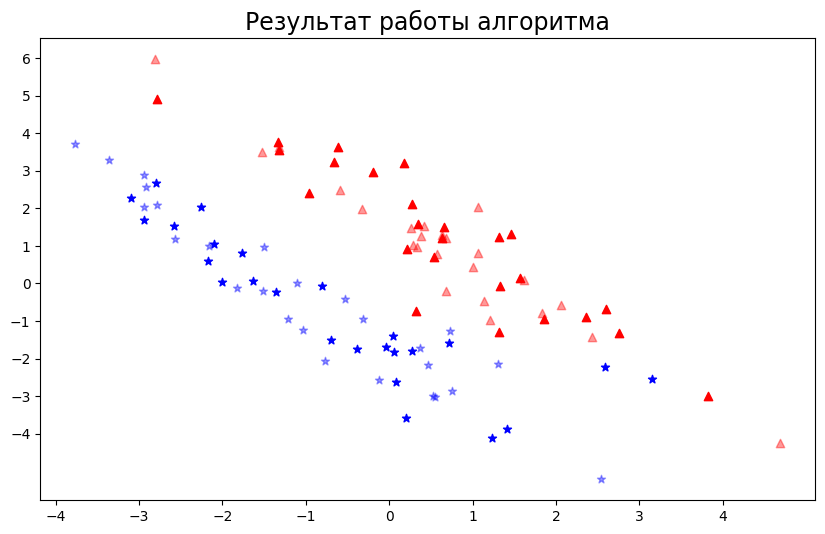

In [152]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()